# Intro to Machine Learning for Detecting Abuse

Dr. Victor Amin (SendGrid)  
June 12th, 2017  
M3AAWG 40th General Meeting, Lisbon

This training has three main sections:  
1. A quick intro to this coding environment.
2. A basic primer on machine learning.
3. A practical example of using machine learning to detect spam.  

***

# 3 Minute Intro to Python and Notebooks
The document you are currently viewing is called a "notebook." It is an interactive environment for running code.

In [1]:
# This grey box is called a "cell." A notebook contains many cells.
# This cell does not do anything, it just contains these comments.

Cells can contain text in a format called [markdown](http://www.markdowntutorial.com/) (like this one, double click here to see), or they can contain code, like the cell below.

In [3]:
# To run this cell and see the output of this code, press Shift+Enter.
# If the code in the cell creates any output, it gets displayed right below the cell.
# Change the text inside the quotes and run the cell again by pressing Shift+Enter.
print("Hello OC!")

Hello OC!


The code in the cells is written in a programming language called "Python." If you do not know Python, that is OK for this introduction - I will describe what the code is doing in plain English so you can follow along. If you would like to learn Python, I highly recommend the free tutorial [Learn Python the Hard Way](https://learnpythonthehardway.org/book/).

In [4]:
x = 6 # This assigns the value "6" to the variable "x"

In [5]:
x # Let's look at what's assigned to variable "x"

6

In [8]:
y = x + 1 # We can assign new variables using values in existing variables.
y # Before running this cell, predict what value "y" now contains.

11

Cells can be executed out of order. Any time you run a cell, it will use the most recent variable assignments. Try running the cell below, and then re-run the cell above. Think about what y will be.

In [7]:
x = 10

# Intro to Machine Learning
Let's get started! Before we tackle abuse, let's learn some fundamentals.

This next cell "imports" some new functionality. The [pandas](http://pandas.pydata.org/) package makes it easy to work with tabular data. The [sklearn](http://scikit-learn.org/stable/) package contains many subpackages with machine learning functionality and example data.

In [9]:
import pandas as pd # We rename the "pandas" package to "pd" to save typing.
from sklearn import datasets, metrics, linear_model, neural_network, model_selection, ensemble

We'll be visualizing data with charts, the cell below adjusts the default charting settings.

In [10]:
import matplotlib # This package contains charting functionality.
# The following command makes our plots show up in the notebook, instead of as a popup:
%matplotlib inline
# Finally, we can change some default settings to make charts more legible:
matplotlib.rcParams.update(
    {'font.size': 22, 'figure.figsize': (16, 8)} # Make font and chart larger.
)

Machine learning uses data to derive a relationship between inputs and outputs. A "best fit line" or "trendline" is a simple example of machine learning. You may have heard of technologies like "neural networks" and "deep learning"; those are also examples of machine learning.

To demonstrate, let's load some example data.

In [11]:
boston_housing_dataset = datasets.load_boston() # Create a new variable containing the Boston dataset.

In [12]:
# Let's print out a bit of background information about this dataset.
print(boston_housing_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Next, lets extract the raw attribute data into a useful tabular format called a "dataframe."

In [13]:
boston_housing_df = pd.DataFrame(
    boston_housing_dataset.data, # Pass in the raw data.
    columns=boston_housing_dataset.feature_names # Label the columns.
)
boston_housing_df.head() # The "head" method prints out just the first few rows of a dataframe.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The "target" or "label" in this dataset (the value we're trying to predict) is the median house price in thousands of dollars. Let's add that data to our dataframe.

In [14]:
boston_housing_df['PRICE_IN_THOUSANDS'] = boston_housing_dataset.target # Create a new column.

In [15]:
boston_housing_df.head() # Let's preview the table again to see the new column.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE_IN_THOUSANDS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
len(boston_housing_df) # How many rows (i.e. what is the length of the table)?

506

Now, we're ready to build our first model! Let's start with something simple: a trendline.

We have lots of attributes to choose from, but let's focus on just one for now. It looks like the "RM" attribute (the average number of rooms per dwelling) correlates with median price:

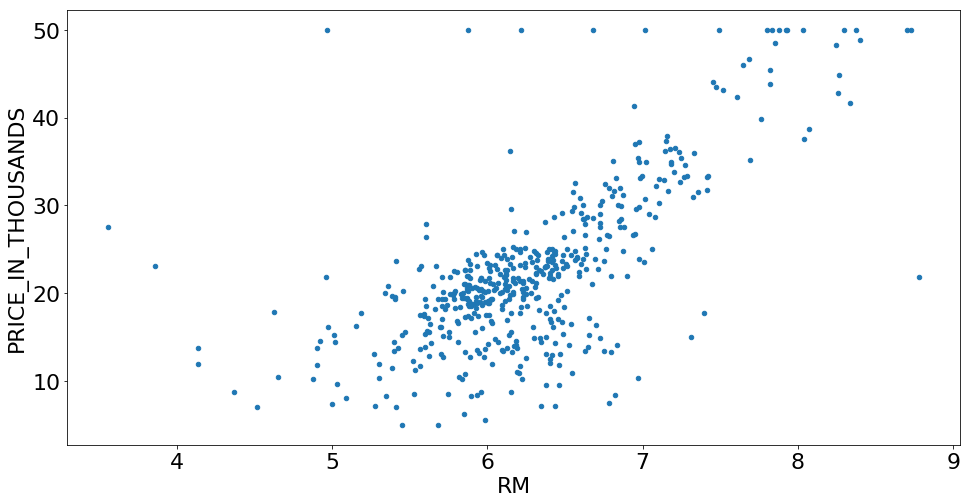

In [17]:
ax = boston_housing_df.plot.scatter('RM', 'PRICE_IN_THOUSANDS') # Plot 'PRICE_IN_THOUSANDS' vs 'RM'.

We'll use an algorithm called "Linear Regression" to fit a trendline to this data.

In [18]:
trendline = linear_model.LinearRegression() # "Linear Regression" is an algorithm for fitting to linear data.

trendline.fit(
    boston_housing_df['RM'].to_frame(), # To fit a line, you need the input (or "x" variable)...
    boston_housing_df['PRICE_IN_THOUSANDS'] # ...and the output (or "y" variable).
)

slope = trendline.coef_[0] # Now that we've fit the data, we get a slope...
intercept = trendline.intercept_ # ...and a y-intercept.

print('y = %.2fx + (%.2f)' % (slope, intercept)) # This will print out the equation for our line.

y = 9.10x + (-34.67)


Now we can plot our trendline onto the scatterplot:

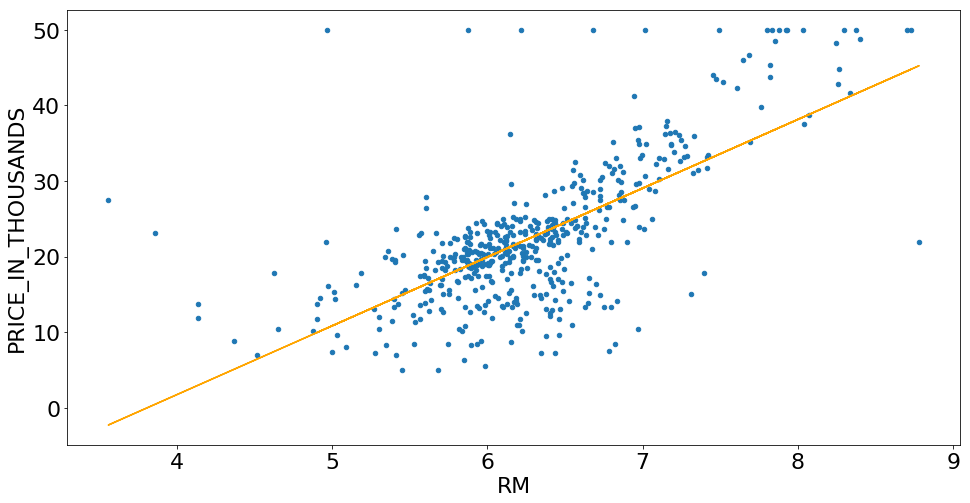

In [19]:
# First, plot the individual data points in a scatter plot.
ax = boston_housing_df.plot.scatter(
    'RM', # Our "x" variable.
    'PRICE_IN_THOUSANDS' # Our "y" variable.
)

# Now, plot our trendline using the equation we fit.
_ = ax.plot(
    boston_housing_df['RM'], # Our "x" data.
    slope*boston_housing_df['RM']+intercept, # Use our slope and intercept to calculate our "y".
    color='orange' # Let's make the line orange so it stands out.
)

Vocab time!

The orange line is a *MODEL*. The data we used to fit the line is the *TRAINING SET*, and each individual data point is a *SAMPLE*. RM (the average number of rooms per dwelling) is an *ATTRIBUTE* or *FEATURE*. PRICE_IN_THOUSANDS is the *TARGET* or *LABEL*. A model can utilize many features, but generally only has one target or label.

A model is a succinct mathematical description of a system. We can use models to predict what will happen in a new situation. The model we just created says that median home prices are driven entirely by average rooms per dwelling, and that when the rooms per dwelling increases by 1, median house prices in the area increase by $9,100.

We can use our model to predict average prices in a neighborhood with a certain number of rooms:

In [20]:
# What if we find a new neighborhood and the average number of rooms is 8?
RM = 7
prediction = slope*RM + intercept
print('The average house price in thousands will be: $%.2f' % prediction)

The average house price in thousands will be: $29.04


Intuitively, we know that this model isn't perfect. There's a lot more to home prices than the number of rooms. Plus, we can see from the chart that there are many points far from the line.

Let's quantify how good this model is. There are many ways to measure model performance, and the best way will depend on the particular problem you are trying to solve, and what your success criteria are. For this model, we're going to use a metric called "mean absolute error." It is the average distance of each point from the trendline. If every point was exactly on the trendline, that would make the mean absolute error 0.

In [21]:
predicted_price = trendline.predict( # For each data point, what does our model think the average price will be?
    boston_housing_df['RM'].to_frame()
)
mae = metrics.mean_absolute_error(
    boston_housing_df['PRICE_IN_THOUSANDS'], # To calculate the error, we compare the true value...
    predicted_price # ...to the predicted value.
)
print('Mean Absolute Error: %.2f' % mae)

Mean Absolute Error: 4.45


However, the way we just measured performance is not fair. Measuring performance this way only tells you how well the model does on data it's seen before. However, models almost always perform worse on new data. In other words, we need to test with data that wasn't in the training set.

We don't have any other data available, but what we can do is randomly split the data we do have into a separate "training" and "testing" datasets:

In [22]:
boston_TRAIN_df, boston_TEST_df = model_selection.train_test_split(
    boston_housing_df,
    test_size=0.33 # Use ~1/3 of the data for our test set.
)
print('Train Samples: %s\nTest Samples: %s' % (len(boston_TRAIN_df), len(boston_TEST_df)))

Train Samples: 339
Test Samples: 167


Now, we train a new trendline using just the data reserved for training:

In [23]:
# Fit our model to TRAINING DATA ONLY
trendline_split = linear_model.LinearRegression()
trendline_split.fit(
    boston_TRAIN_df['RM'].to_frame(), # Our features, just the training samples.
    boston_TRAIN_df['PRICE_IN_THOUSANDS']) # Our labels, just the training samples.

# Get our slop and intercept
slope_train = trendline_split.coef_[0]
intercept_train = trendline_split.intercept_

# Print equation
print('y = %.2fx + (%.2f)' % (slope_train, intercept_train))

y = 8.60x + (-31.69)


Notice that the model is now slightly different. Originally, it was `y = 9.10x + (-34.67)`. Let's plot both models together on the same chart:

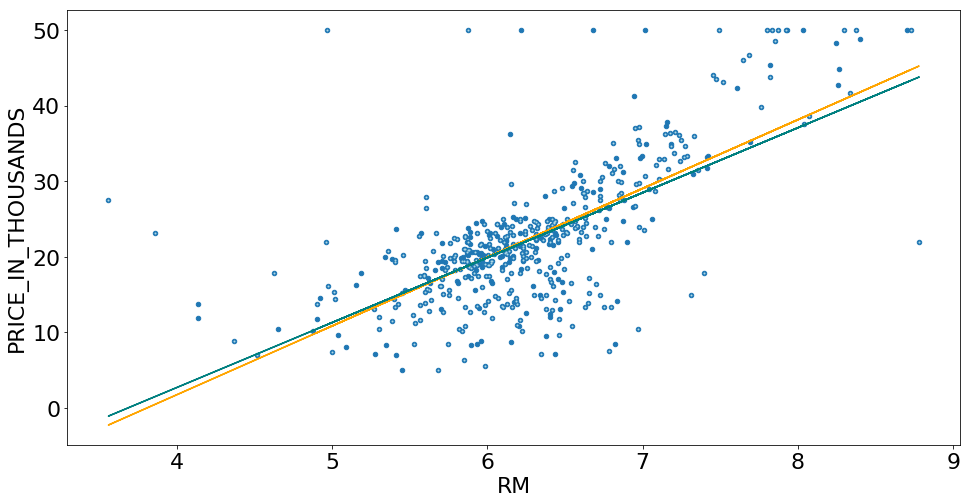

In [24]:
# Note: the way plotting works in matplotlib allows you to "stack" multiple charts.
# That's how we're getting all of the data into one chart.
ax = boston_housing_df.plot.scatter('RM', 'PRICE_IN_THOUSANDS') # Scatterplot.
boston_TRAIN_df.plot.scatter( # Highlight training data in light blue.
    'RM',
    'PRICE_IN_THOUSANDS',
    color='lightblue',
    s=1,
    ax=ax
)
_ = ax.plot( # Line plot, original model, in orange.
    boston_housing_df['RM'],
    slope*boston_housing_df['RM']+intercept,
    color='orange'
)
_ = ax.plot( # Line plot, training set only model, in teal.
    boston_housing_df['RM'],
    slope_train*boston_housing_df['RM']+intercept_train,
    color='teal'
)

Now, let's calculate our error on the training set and the test set. The test set error is *almost always* greater than the training set error, and it's a much better indicator of how well your model might perform "in the wild."

In [25]:
# Predict prices for train and test data
predicted_price_train = trendline_split.predict(boston_TRAIN_df['RM'].to_frame())
predicted_price_test = trendline_split.predict(boston_TEST_df['RM'].to_frame())

# Calculate MAE for train and test data
mae_train = metrics.mean_absolute_error(
    boston_TRAIN_df['PRICE_IN_THOUSANDS'], # True answer, training data only.
    predicted_price_train # Predicted answer, training data only.
)
mae_test = metrics.mean_absolute_error(
    boston_TEST_df['PRICE_IN_THOUSANDS'], # True answer, test data only.
    predicted_price_test # Predicted answer, test data only.
)

# Print results
print('Train Error: %.2f' % mae_train)
print('Test Error: %.2f' % mae_test)

Train Error: 4.49
Test Error: 4.46


These error numbers will change every time you run the notebook because the the split between training data and testing data is random!  

You may notice that the test error and train error are close, or even that the test error is lower than the test error. This is sometimes the case with *very* simple models, but generally for complex models the test error is always greater.

Most things you'd want to predict have more than one driver. We focused on one particular driver of neigborhood home prices, the average number of rooms, but we can build a better model by using all the data we have available:

In [26]:
# Fit a regression model with multiple features
multiple_regression = linear_model.LinearRegression()
multiple_regression.fit(
    X=boston_TRAIN_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']], # All the features! Don't forget, use separate training data.
    y=boston_TRAIN_df['PRICE_IN_THOUSANDS'] # We're still trying to predict prices.
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# Predict prices on train and test data.
predicted_price_multi_train = multiple_regression.predict(
    boston_TRAIN_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']] # Test with our held-out test data.
)
predicted_price_multi_test = multiple_regression.predict(
    boston_TEST_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']] # Test with our held-out test data.
)

# Calculate MAE on train and test data
mae_multi_train = metrics.mean_absolute_error(
    boston_TRAIN_df['PRICE_IN_THOUSANDS'], # True output.
    predicted_price_multi_train # Predicted output
)
mae_multi_test = metrics.mean_absolute_error(
    boston_TEST_df['PRICE_IN_THOUSANDS'], # True output.
    predicted_price_multi_test # Predicted output
)

print('Train Mean Absolute Error: %.2f' % mae_multi_train)
print('Test Mean Absolute Error: %.2f' % mae_multi_test)

Train Mean Absolute Error: 3.20
Test Mean Absolute Error: 3.47


And, just for fun, we can solve the same problem with a neural network:

In [28]:
# Train a neural network
neural_regression = neural_network.MLPRegressor(
    hidden_layer_sizes=(10,2),
    early_stopping=True,
    activation='identity',
    solver='lbfgs',
    alpha=.5,
    max_iter=1000,
    learning_rate='adaptive'
)
neural_regression.fit(
    X=boston_TRAIN_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']],
    y=boston_TRAIN_df['PRICE_IN_THOUSANDS']
)

MLPRegressor(activation='identity', alpha=0.5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(10, 2), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [29]:
# Predict prices using neural network on train and test data
predicted_price_neural_train = neural_regression.predict(
    boston_TRAIN_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
)
predicted_price_neural_test = neural_regression.predict(
    boston_TEST_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
)

# Calcualte MAE for train and test data
mae_neural_train = metrics.mean_absolute_error(
    boston_TRAIN_df['PRICE_IN_THOUSANDS'],
    predicted_price_neural_train
)
mae_neural_test = metrics.mean_absolute_error(
    boston_TEST_df['PRICE_IN_THOUSANDS'],
    predicted_price_neural_test
)

# Print error
print('Train Mean Absolute Error: %.2f' % mae_neural_train)
print('Test Mean Absolute Error: %.2f' % mae_neural_test)

Train Mean Absolute Error: 3.27
Test Mean Absolute Error: 3.30


There are dozens of algorithms available in scikit-learn, each with its own strengths and weaknesses: http://scikit-learn.org/stable/supervised_learning.html. The best algorithm will depend on your problem. It's generally a good idea to try a variety of different algorithms to see what works best.

# Let's Tackle Abuse
Now that we've learned some machine learning basics, let's try building a model to detect spam subject lines.

## Gather packages and data

In [30]:
# We already did this, but if you're skipping ahead it's convenient to have the imports here.
import pandas as pd # We rename the "pandas" package to "pd" to save typing.
from sklearn import datasets, metrics, linear_model, neural_network, model_selection, ensemble

import matplotlib # This package contains charting functionality.
# The following command makes our plots show up in the notebook, instead of as a popup:
%matplotlib inline
# Finally, we can change some default settings to make charts more legible:
matplotlib.rcParams.update(
    {'font.size': 22, 'figure.figsize': (16, 8)} # Make font and chart larger.
)

In [31]:
# FOLLOW THESE 3 STEPS TO IMPORT TRAINING DATA:
# 1. Download the file "trec05p-1_subj_from.csv" from:
#               https://goo.gl/7hqbjA [Google Drive, 9MB]
# 2. In the notebook interface, go to the "Data" menu and select "Upload..." to upload the file you just downloaded.
# 3. Run this cell.
# Unfortunately, you will need to follow these steps each time you open the notebook.

# The data was derived from the 2005 TREC Public Spam Corpus
# http://plg.uwaterloo.ca/~gvcormac/treccorpus/
trec_subjects_df = pd.read_csv(
    '/home/nbuser/trec05p-1_subj_from.csv', # This is where the file goes when you upload.
    usecols=['label', 'subject'] # We only need these two columns (there is a "from" column, but we won't be using it today).
).dropna() # This last part removes rows that have missing data.

*(If you just got a "FileNotFoundError", follow the steps in the cell above to import the file into the notebook, then run the cell again.)*

## Explore the data
Before we get to machine learning, it's a good idea to explore the data.

In [32]:
trec_subjects_df.head() # Let's look at the first few rows to get a feel for the data.

,label,subject
0,ham,"FW: June 29 -- BNA, Inc. Daily Labor Report"
1,ham,NGX failover plan.
2,ham,RE: Intranet Site
3,ham,FW: ENA Upstream Company information
4,ham,New Master Physical


In [33]:
len(trec_subjects_df) # How many data points do we have?

88491

What's different about this data compared to the housing data?

In [34]:
# How many of each label do we have? Close to equal numbers is good.
trec_subjects_df['label'].value_counts() # The "value_counts" method tallies how often each value appears.

spam    51325
ham     37166
Name: label, dtype: int64

In [35]:
# We can also check out a random sample of spam rows...
trec_subjects_df[trec_subjects_df['label']=='spam'].sample(10)

,label,subject
78536,spam,Software News
2767,spam,Market Movers and Shakers
66521,spam,Feeling overweight? Get Med s to help
37427,spam,re:[1]Shake Flashlight - вечный фонарик!
64593,spam,D.M.E
77441,spam,can I be your friend?
9341,spam,Begin 2005 a new you abramson conjunct
21801,spam,Elloelloello :)
17406,spam,heyy
42790,spam,fwd:По поводу заказа


In [36]:
# Compare to ham. What do you notice?
trec_subjects_df[trec_subjects_df['label']=='ham'].sample(5)

,label,subject
23392,ham,Re: Certified ZEVs
31352,ham,RE: VMAC NDA
56412,ham,Weekend - Notes
31389,ham,FW: Williamette Enovative
19876,ham,FW: Question


# Separate out your test set
Any time we are learining something from the data, we will use the training set. The test set will be used for measurement and measurement only!

In [37]:
trec_TRAIN_df, trec_TEST_df = model_selection.train_test_split(
    trec_subjects_df,
    test_size=0.2 # Use 20% of the data for our test set.
)

trec_TRAIN_df = trec_TRAIN_df.copy() # Why? Pandas, by default, tries to save memory by not copying data into derived dataframes.
trec_TEST_df = trec_TEST_df.copy()

print('Train Samples: %s' % len(trec_TRAIN_df))
print('Test Samples: %s' % len(trec_TEST_df))

Train Samples: 70792
Test Samples: 17699


## Try some simple models to get a baseline

There's more spam than ham here. We can beat 50% accuracy just by saying everything is spam!

In [38]:
always_spam_acc_train = metrics.accuracy_score(
    trec_TRAIN_df['label'], # The actual label.
    ['spam']*len(trec_TRAIN_df) # Spam for every row.
)
always_spam_acc_test = metrics.accuracy_score(
    trec_TEST_df['label'], # The actual label.
    ['spam']*len(trec_TEST_df) # Spam for every row.
)

print('TRAIN accuracy if we call everything spam: %.2f%%' % (always_spam_acc_train*100))
print('TEST accuracy if we call everything spam: %.2f%%' % (always_spam_acc_test*100))

TRAIN accuracy if we call everything spam: 57.83%
TEST accuracy if we call everything spam: 58.66%


Another simple thing we could try is identifying whether a subject line contains common spam or ham words. Let's start by analyzing the words used in spam vs ham subject lines.

In [39]:
# We can separate our subject lines by whether they are "spam" or "ham".
spam_subjects = trec_TRAIN_df[trec_TRAIN_df['label']=='spam']['subject']
ham_subjects = trec_TRAIN_df[trec_TRAIN_df['label']=='ham']['subject']

ham_subjects.head() # Each variable is a list subject lines.

60387              Schedule Crawler: HourAhead Failure
10112                             Van Steven Dickerson
44617    RE: EOL and Clickpaper Approvals for 11-20-01
37406            Thanksgiving - Coming Through Houston
28067                          Power Credit Watch List
Name: subject, dtype: object

In [40]:
# Next, we can convert each list of subject lines into a list of words.
spam_words = pd.Series(
    spam_subjects.str.cat(sep=' ').lower().split() # We make the words lowercase so that they're the same even if they were capitalized differently.
)
ham_words = pd.Series(
    ham_subjects.str.cat(sep=' ').lower().split()
)

spam_words.sample(10) # Each of these variables is a list of lowercase words.

108812                       april
148244    shelley_corman@enron.com
23126                         free
7212                          card
42261                         안되세요
108792                    product!
111024                        twhz
102742                    판매!!품질보증
144818                      zrqoyz
101245                        2001
dtype: object

In [41]:
# This code counts word frequencies, and then normalizes by total number of words.
# The result is the "rate" at which each word appears for ham and spam subject lines.
spam_word_rates = spam_words.value_counts() / len(spam_words)
ham_word_rates = ham_words.value_counts() / len(ham_words)

spam_word_rates.sort_values(ascending=False).head(5) # Top 5 spam "words"

-       0.013956
the     0.013341
for     0.012871
your    0.011869
you     0.011476
dtype: float64

Those words don't look very bad, do they? There's even some overlap with the most common ham words:

In [42]:
ham_word_rates.sort_values(ascending=False).head()

re:    0.043530
fw:    0.027745
-      0.024978
for    0.019530
of     0.011256
dtype: float64

What actually matters is whether words are *more common* for spam or ham.

In [43]:
# We can divide spam word rates by ham word rates to find words that occur more in spam subject lines.
spam_enriched_words = (spam_word_rates / ham_word_rates).sort_values(ascending=False)
spam_enriched_words.head(5)

meds      286.929631
viagra    252.237887
cheap     213.932420
75%       203.813994
100%      170.567740
dtype: float64

In [44]:
# These words are ranked by how much more often they show up in ham subject lines.
ham_enriched_words = (ham_word_rates / spam_word_rates).sort_values(ascending=False)
ham_enriched_words.head(5)

enron     1441.726319
tw         256.660492
ferc       242.132539
past       217.227478
outage     211.693020
dtype: float64

Now, we can build a really simple spam detector by looking for common spam words in subject lines:

In [45]:
# First, we write a function that looks for spam words in subject lines.
def simple_spam_detector(subject_line, spam_words):
    """This is a function that returns 'spam' if the subject_line contains any spam_words."""
    subject_line_wordlist = subject_line.lower().split()
    if any(word in subject_line_wordlist for word in spam_words):
        return 'spam'
    else:
        return 'ham'

# Next, we make a list of the spammiest words.
# Let's use anything that's more than 10x more likely to be found in a spam subject line.
top_spam_words = spam_enriched_words[spam_enriched_words>10].index.tolist()

# Apply our spam detector to the subject lines in our test set...
simple_spam_detector_train = trec_TRAIN_df['subject'].map(
    lambda subject: simple_spam_detector(subject, top_spam_words)
)
simple_spam_detector_test = trec_TEST_df['subject'].map(
    lambda subject: simple_spam_detector(subject, top_spam_words)
)

# ...and measure our accuracy!
simple_acc_train = metrics.accuracy_score(
    trec_TRAIN_df['label'],
    simple_spam_detector_train
)
simple_acc_test = metrics.accuracy_score(
    trec_TEST_df['label'],
    simple_spam_detector_test
)

print('Simple spam detector TRAIN accuracy is: %.2f%%' % (simple_acc_train*100))
print('Simple spam detector TEST accuracy is: %.2f%%' % (simple_acc_test*100))

Simple spam detector TRAIN accuracy is: 60.63%
Simple spam detector TEST accuracy is: 60.65%


Remember, we got 58% accuracy just by guessing "spam" for everything. This isn't great. Let's try to improve it.

In [46]:
# New hypothesis: it's spam if there are at least as many spammy words as hammy words
def simple_spam_detector_v2(subject_line, spam_words, ham_words):
    """This function returns 'spam' if there are more spam words than ham words in the subject line."""
    subject_line_wordlist = subject_line.lower().split()
    spam_word_count = sum(word in subject_line_wordlist for word in spam_words)
    ham_word_count = sum(word in subject_line_wordlist for word in ham_words)
    if spam_word_count>=ham_word_count:
        return 'spam'
    else:
        return 'ham'

# This time, let's get top spam words and top ham words
top_spam_words = spam_enriched_words[spam_enriched_words>10].index.tolist()
top_ham_words = ham_enriched_words[ham_enriched_words>10].index.tolist()

# Apply the spam detector v2 function...
simple_v2_train = trec_TRAIN_df['subject'].map(
    lambda subject: simple_spam_detector_v2(subject, top_spam_words, top_ham_words)
)
simple_v2_test = trec_TEST_df['subject'].map(
    lambda subject: simple_spam_detector_v2(subject, top_spam_words, top_ham_words)
)

# ...and measure accuracy!
simple_v2_acc_train = metrics.accuracy_score(
    trec_TRAIN_df['label'],
    simple_v2_train
)
simple_v2_acc_test = metrics.accuracy_score(
    trec_TEST_df['label'],
    simple_v2_test
)
print('Simple spam detector TRAIN accuracy is: %.2f%%' % (simple_v2_acc_train*100))
print('Simple spam detector TEST accuracy is: %.2f%%' % (simple_v2_acc_test*100))

Simple spam detector TRAIN accuracy is: 81.78%
Simple spam detector TEST accuracy is: 82.00%


That's better! Still, not very useful. But, now we understand the problem a little better, and we built some things that will help us build a machine learning model.

# Building a machine learning model

### Features

The first thing need to do is build our *features*. Features are numerical representations of your samples. In our intro example, we were provided with features. Now, we have to build our own.

In [47]:
trec_TRAIN_df.head()

,label,subject
65398,spam,You should start e-shopping for tablets earlie...
60387,ham,Schedule Crawler: HourAhead Failure
10112,ham,Van Steven Dickerson
4201,spam,The Next Grand Slam st0ck?
60162,spam,Thats how p/orn stars do it


The work we've done already is a good place to start. For each spammy or hammy word, we can create a feature that indicates if it shows up in the subject line.

In [48]:
# Let's get top spam words and top ham words again.
top_spam_words = spam_enriched_words[spam_enriched_words>10].index.tolist()
top_ham_words = ham_enriched_words[ham_enriched_words>10].index.tolist()

# For each of these words, we will create a "feature" column.
# If the word is in the subject line, we put a 1, otherwise, 0.
for word in top_spam_words + top_ham_words:
    # First for the training data.
    trec_TRAIN_df['feature_%s' % word] = trec_TRAIN_df['subject'].str.lower().map(
        lambda subject: word in subject
    ).astype(int)
    # Then for the test data.
    trec_TEST_df['feature_%s' % word] = trec_TEST_df['subject'].str.lower().map(
        lambda subject: word in subject
    ).astype(int)

In [49]:
trec_TRAIN_df.head()

,label,subject,feature_meds,feature_viagra,feature_cheap,feature_75%,feature_100%,feature_$20,feature_penny,feature_xp,...,feature_complaint,feature_terms,feature_proceedings,feature_wood,feature_letter,feature_printing,feature_dec.,feature_call,feature_transaction,feature_general
65398,spam,You should start e-shopping for tablets earlie...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60387,ham,Schedule Crawler: HourAhead Failure,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10112,ham,Van Steven Dickerson,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4201,spam,The Next Grand Slam st0ck?,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60162,spam,Thats how p/orn stars do it,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
len(trec_TRAIN_df.columns)-2

601

It's generally a good idea to explore the distribution of your features.

In [52]:
# How often does "meds" show up in subject lines?
trec_TRAIN_df['feature_meds'].value_counts()

0    70323
1      469
Name: feature_meds, dtype: int64

In [53]:
# How often does "meds" show up in ham vs spam subject lines?
pd.crosstab(trec_TRAIN_df['feature_meds'], trec_TRAIN_df['label'])

label,ham,spam
feature_meds,,
0,29849,40474
1,1,468


In [54]:
# How often does "past" show up in ham vs spam subject lines?
pd.crosstab(trec_TRAIN_df['feature_past'], trec_TRAIN_df['label'])

label,ham,spam
feature_past,,
0,29691,40940
1,159,2


### Random forest model version 1

In [55]:
# Our model will need to know which columns contain features.
features = [col for col in trec_TRAIN_df if col.startswith('feature')]
features

['feature_meds',
 'feature_viagra',
 'feature_cheap',
 'feature_75%',
 'feature_100%',
 'feature_$20',
 'feature_penny',
 'feature_xp',
 'feature_sex',
 'feature_each',
 'feature_specials',
 'feature_low',
 'feature_thread',
 'feature_custom',
 'feature_download',
 'feature_:)',
 'feature_generic',
 'feature_amazing',
 'feature_her',
 'feature_soft',
 'feature_2004',
 'feature_80%',
 'feature_windows',
 'feature_mortgage',
 'feature_cable',
 'feature_growth',
 'feature_recommended',
 'feature_someone',
 'feature_extra',
 'feature_6.0',
 'feature_their',
 'feature_software',
 'feature_health',
 'feature_pc',
 'feature_fast',
 'feature_paypal',
 'feature_re[2]:',
 'feature_traffic',
 'feature_used',
 'feature_boost',
 'feature_easy',
 'feature_dating',
 'feature_needed!',
 'feature_secret',
 'feature_z',
 'feature_loans',
 'feature_drugs',
 'feature_best',
 'feature_pill',
 'feature_healthy',
 'feature_less',
 'feature_don`t',
 'feature_magazine',
 'feature_mens',
 'feature_better',
 'fe

In [56]:
len(features)

601

In [57]:
# Create a new classifier
rf_clf_v1 = ensemble.RandomForestClassifier( # http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    n_estimators=32, # How many trees? More is better, but slower.
    n_jobs=-1
)

# Fit our training data
rf_clf_v1.fit(trec_TRAIN_df[features], trec_TRAIN_df['label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [58]:
# Make predictions
rf_v1_predictions_train = rf_clf_v1.predict(trec_TRAIN_df[features])
rf_v1_predictions_test = rf_clf_v1.predict(trec_TEST_df[features])

# Measure accuracy
rf_v1_acc_train = metrics.accuracy_score(trec_TRAIN_df['label'], rf_v1_predictions_train)
rf_v1_acc_test = metrics.accuracy_score(trec_TEST_df['label'], rf_v1_predictions_test)

print('Random Forest v1 TRAIN accuracy is: %.2f%%' % (rf_v1_acc_train*100))
print('Random Forest v1 TEST accuracy is: %.2f%%' % (rf_v1_acc_test*100))

Random Forest v1 TRAIN accuracy is: 90.40%
Random Forest v1 TEST accuracy is: 87.50%


Note the significant gap between train and test accuracy. The Random Forest algorithm can fit very tightly to data, sometimes too tightly. This is called "overfitting." We can see from the train/test accuracy gap that our model is fitting to aspects of the data that matter only for the training set, and don't generalize well.  

This is why we test! What can we do about it? More data is the best solution. As the amount of data you have increases, the gap between train and test accuracy generally *decreases*.

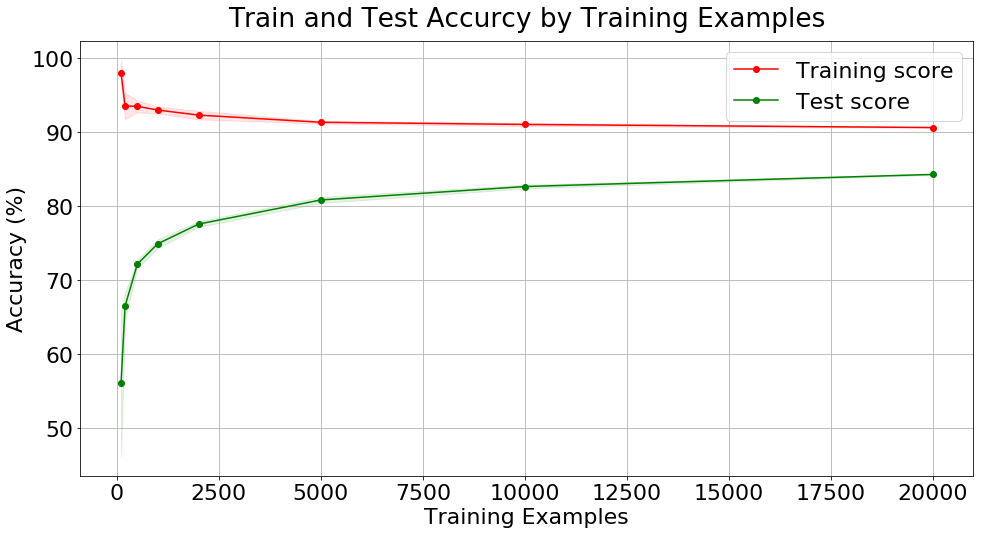

In [59]:
# This code trains models using a range of training set sizes and plots the train and test accuracy.

# Here's the model we're going to evaluate
rf_clf_v1_lc = ensemble.RandomForestClassifier( # http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    n_estimators=8, # How many trees? More is better, but slower.
    n_jobs=-1
)

# This function trains multiple models, 3 for each train size, and returns train and test score.
train_sizes, train_scores, test_scores = model_selection.learning_curve(
    rf_clf_v1_lc,
    trec_TRAIN_df[features],
    trec_TRAIN_df['label'],
    cv=3,
    train_sizes=[100, 200, 500, 1000, 2000, 5000, 10000, 20000]
)

# We average together scores from the 3 runs at each size
train_scores_mean = 100*train_scores.mean(axis=1)
train_scores_std = 100*train_scores.std(axis=1)
test_scores_mean = 100*test_scores.mean(axis=1)
test_scores_std = 100*test_scores.std(axis=1)

# Finally, let's plot the results
matplotlib.pyplot.figure()
matplotlib.pyplot.title('Train and Test Accurcy by Training Examples', y=1.02)
matplotlib.pyplot.xlabel('Training Examples')
matplotlib.pyplot.ylabel('Accuracy (%)')
matplotlib.pyplot.grid()
matplotlib.pyplot.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
matplotlib.pyplot.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
matplotlib.pyplot.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
matplotlib.pyplot.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")
_ = matplotlib.pyplot.legend(loc="best")

### Model version 2: learn from version 1

What does model v1 miss?

In [60]:
trec_TRAIN_df[trec_TRAIN_df['label']!=rf_v1_predictions_train][['subject', 'label']].sample(30)

,subject,label
82332,RE,spam
69596,Outstanding business,spam
82197,You launched a website but no one visits it?,spam
25478,RE: Logon,ham
91360,"裝-機,升-級,一套軟體輕易搞定pendant",spam
65513,Liquidation Values,ham
42002,Pope,ham
8147,Here you go. 4/29/01,ham
36497,Re: /52-24/Phharmacy,spam
71363,Sasser Standard - Analysis on Chronic Pa|n In ...,spam


In [61]:
def add_features_v2(df):
    df['feature_ALL_CAPS'] = (df['subject'] == df['subject'].str.upper()).astype(int)
    df['feature_all_lower'] = (df['subject'] == df['subject'].str.lower()).astype(int)
    df['feature_all_ascii_chars'] = df['subject'].map(lambda s: all(ord(c) < 128 for c in s)).astype(int)
    df['feature_$'] = df['subject'].map(lambda x: '$' in x).astype(int)
    df['feature_@'] = df['subject'].map(lambda x: '@' in x).astype(int)
    df['feature_0'] = df['subject'].map(lambda x: '0' in x).astype(int)
    df['feature_:)'] = df['subject'].map(lambda x: ':)' in x).astype(int)
    df['feature_memy'] = df['subject'].str.lower().map(lambda x: 'me' in x or 'my' in x).astype(int)
    df['feature_re'] = df['subject'].str.lower().map(lambda s: s.startswith('re:')).astype(int)
    df['feature_fwd'] = df['subject'].str.lower().map(lambda s: s.startswith('fw:') or s.startswith('fwd:')).astype(int)

add_features_v2(trec_TRAIN_df)
add_features_v2(trec_TEST_df)

In [62]:
pd.crosstab(trec_TRAIN_df['feature_all_ascii_chars'], trec_TRAIN_df['label'])

label,ham,spam
feature_all_ascii_chars,,
0,17,10973
1,29833,29969


In [63]:
pd.crosstab(trec_TRAIN_df['feature_fwd'], trec_TRAIN_df['label'])

label,ham,spam
feature_fwd,,
0,25726,40606
1,4124,336


In [64]:
# Our features have changed, so let's get the new set of names
features = [col for col in trec_TRAIN_df if col.startswith('feature')]

# Create a new classifier
rf_clf_v2 = ensemble.RandomForestClassifier( # http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    n_estimators=32, # How many trees? More is better, but slower.
    n_jobs=-1
)

# Fit our training data
rf_clf_v2.fit(trec_TRAIN_df[features], trec_TRAIN_df['label'])

# Make predictions on train and test
rf_v2_predictions_train = rf_clf_v2.predict(trec_TRAIN_df[features])
rf_v2_predictions_test = rf_clf_v2.predict(trec_TEST_df[features])

# Evaluate performance
rf_v2_acc_train = metrics.accuracy_score(trec_TRAIN_df['label'], rf_v2_predictions_train)
rf_v2_acc_test = metrics.accuracy_score(trec_TEST_df['label'], rf_v2_predictions_test)

# Print results
print('Random Forest v2 TRAIN accuracy is: %.2f%%' % (rf_v2_acc_train*100))
print('Random Forest v2 TEST accuracy is: %.2f%%' % (rf_v2_acc_test*100))

Random Forest v2 TRAIN accuracy is: 94.92%
Random Forest v2 TEST accuracy is: 91.56%


### Model v3: ml can utilize very basic features

In [65]:
def add_features_v3(df):
    """A bunch of features that aren't particularly human-friendly."""
    df['feature_len'] = df['subject'].map(len)
    df['feature_words'] = df['subject'].map(lambda x: len(x.split()))
    df['feature_chars_per_word'] = (df['feature_len'] / df['feature_words']).fillna(0.)
    df['feature_digits'] = df['subject'].map(lambda x: sum(c.isdigit() for c in x))
    df['feature_punc'] = df['subject'].map(lambda s: sum([1 for x in s if x in set('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')]))
    
add_features_v3(trec_TRAIN_df)
add_features_v3(trec_TEST_df)

In [66]:
# Our features have changed, so let's get the new set of names
features = [col for col in trec_TRAIN_df if col.startswith('feature')]

# Create a new classifier
rf_clf_v3 = ensemble.RandomForestClassifier( # http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    n_estimators=32, # How many trees? More is better, but slower.
    n_jobs=-1
)

# Fit our training data
rf_clf_v3.fit(trec_TRAIN_df[features], trec_TRAIN_df['label'])

# Make predictions on train and test
rf_v3_predictions_train = rf_clf_v3.predict(trec_TRAIN_df[features])
rf_v3_predictions_test = rf_clf_v3.predict(trec_TEST_df[features])

# Evaluate performance
rf_v3_acc_train = metrics.accuracy_score(trec_TRAIN_df['label'], rf_v3_predictions_train)
rf_v3_acc_test = metrics.accuracy_score(trec_TEST_df['label'], rf_v3_predictions_test)

# Print results
print('Random Forest v3 TRAIN accuracy is: %.2f%%' % (rf_v3_acc_train*100))
print('Random Forest v3 TEST accuracy is: %.2f%%' % (rf_v3_acc_test*100))

Random Forest v3 TRAIN accuracy is: 99.16%
Random Forest v3 TEST accuracy is: 94.16%


In [67]:
trec_TEST_df[trec_TEST_df['label']!=rf_v3_predictions_test][['subject', 'label']].sample(30)

,subject,label
50185,"You know, I've been wondering....",ham
53720,You can go,spam
71720,check this out,spam
41390,EPSA Draft Comments on TRANSLink ITC Proposal,ham
21380,Julia Travel,ham
54370,Kermit to Beaver,ham
23283,Another Ga-ITS Prospect,ham
70614,"FERC 101/102: March 4-5 Chicago, Ill",spam
22480,Korea Drama Poster Free(5pcs),spam
86241,hello,spam


Let's see how we did today:

In [68]:
results_summary_df = pd.DataFrame({
    'Model': ['Always Spam', 'Simple v1', 'Simple v2', 'RF v1', 'RF v2', 'RF v3'],
    'Train Accuracy': [100*always_spam_acc_train, 100*simple_acc_train, 100*simple_v2_acc_train, 100*rf_v1_acc_train, 100*rf_v2_acc_train, 100*rf_v3_acc_train],
    'Test Accuracy': [100*always_spam_acc_test, 100*simple_acc_test, 100*simple_v2_acc_test, 100*rf_v1_acc_test, 100*rf_v2_acc_test, 100*rf_v3_acc_test]
})
results_summary_df

,Model,Test Accuracy,Train Accuracy
0,Always Spam,58.664331,57.834219
1,Simple v1,60.647494,60.628320
2,Simple v2,81.998983,81.780427
3,RF v1,87.496469,90.401458
4,RF v2,91.558845,94.916092
5,RF v3,94.163512,99.155272


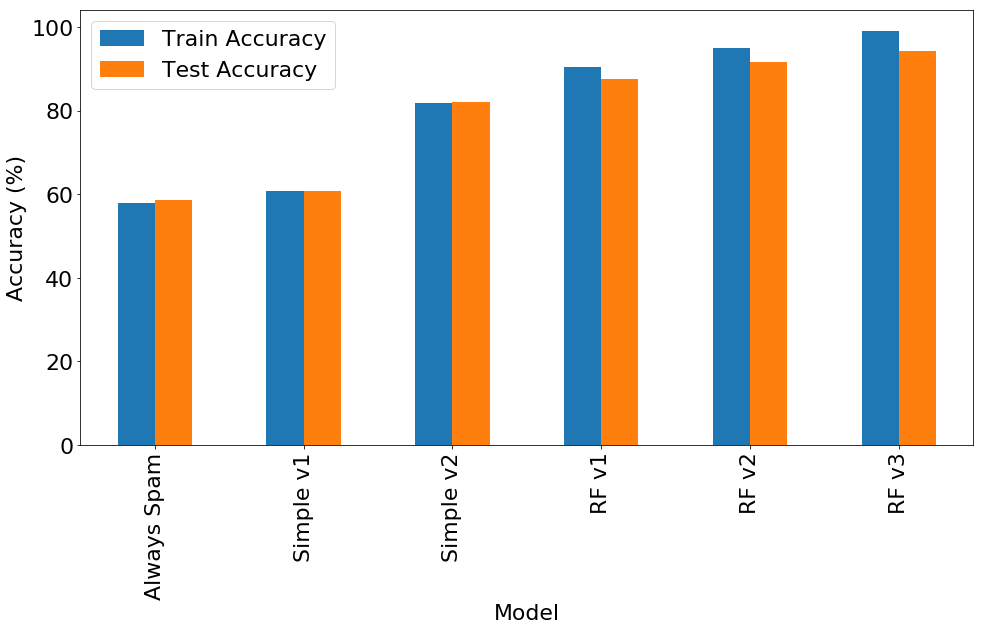

In [69]:
ax = results_summary_df.plot.bar('Model', ['Train Accuracy', 'Test Accuracy'])

_ = ax.set_ylabel('Accuracy (%)')

We started with a model that's barely better than guessing, and ended by building a machine learning model with greater than 90% accuracy. That's not the end, though; it is possible to acheive even better performance with this data, and I encourage everyone to start experimenting with new and better features as a way to learn.

# Learn More
I hope this intro has whetted your appetite. There are _tons_ of free resources online to learn more about these topics. Here are some of my favoriate.

* As mentioned previously, [Learn Python the Hard Way](https://learnpythonthehardway.org/book/) is a great resource for learning Python.
* [A visual introduction to machine learning](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) is a fun way to build a little more intuition around basic ML concepts.
* Check out these [tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) to learn more about notebooks and pandas.
* Once you have some familiarity with the basics of Python and ML, [scikit-learn's tutorials](http://scikit-learn.org/stable/tutorial/index.html) are good for building hands-on ML knowledge.
* In this training, we've pretty much exclusively used "error" and "accuracy" to evaluate machine learning models. That's not always the best thing to do. Read [Why accuracy alone is a bad measure for classification tasks, and what we can do about it](https://tryolabs.com/blog/2013/03/25/why-accuracy-alone-bad-measure-classification-tasks-and-what-we-can-do-about-it/) to learn why.
* Building intuition around bias and variance is an important fundamental skill. Start with Scott Fortmann-Roe's essay [Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html).
* I also highly recommend reading this paper, [A Few Useful Things to Know about Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf), when you are ready to start using ML on your own.
* Finally, if you prefer a more formal classroom setting, [Andrew Ng's Coursera course on machine learning](https://www.coursera.org/learn/machine-learning) is a fantastic place to start. It's free!

# Extra Credit

In [ ]:
# Let's get more detailed information about the performance of our best model.
# Would you use it in production? Probably not.
print(metrics.classification_report(
    trec_TEST_df['label'], 
    rf_v3_predictions_test,
    digits=4
))

In [ ]:
# What if we could make sure the classifier only said 'spam' if it was particularly sure?
# We can do that by adjusting the probability threshold.

def probs_to_class(probs, threshold=0.5):
    # Converts raw spam probability to a label
    if probs > threshold:
        return 'spam'
    else:
        return 'ham'

pd.Series(rf_clf_v3.predict_proba(trec_TEST_df.head()[features])[:, 1]).map(probs_to_class)

In [ ]:
# By default, the classifier's threshold is 0.5.
# That means if the estimated spam probability is greater than 50%, label as spam.
print(metrics.classification_report(
    trec_TEST_df['label'],
    pd.Series(rf_clf_v3.predict_proba(trec_TEST_df[features])[:, 1]).map(
        lambda p: probs_to_class(p, 0.5)
    ),
    digits=4
))

In [ ]:
# Let's look at the distribution of probabilities in our test set.

ax = pd.Series(rf_clf_v3.predict_proba(trec_TEST_df[features])[:, 1]).plot.hist(bins=50, edgecolor='white')

In [ ]:
# Choosing a higher threshold gets you precision, but at the cost of recall.
print(metrics.classification_report(
    trec_TEST_df['label'],
    pd.Series(rf_clf_v3.predict_proba(trec_TEST_df[features])[:, 1]).map(
        lambda p: probs_to_class(p, 0.97)
    ),
    digits=3
))

## A note on running a model like this in production

With an adjusted threshold, this model is close to being suitable for real-world abuse detection as part of a broader portfolio of abuse detection techniques. However, there are a few things I would do before considering using this model in production:

1. Most importantly, the training set needs to be augmented with data from the actual mailstream you will be filtering. Every mailstream is different, and a ML model trained on one source of mail will perform worse, if not poorly, on a different one. The best thing you can do for your model is to gather and label your own training data, rather than relying on what is available from other sources. As a general rule of thumb (which you should test for yourself!), you should try to ensure that non-native data makes up no more than one-third of your training set. That means you need to collect a lot more samples. It takes less time than you would think; most people underestimate the value of simply spending time manually labeling more training samples.

2. Many of the features are based on particular words. We know that spammers try to avoid filtering by using variations on key words and phrases. Building features that are a little more flexible (for example, a feature that will catch "viagra" and anything within one letter substition of that word) is a good idea. Be careful, though: being too flexible with certain words can cause trouble. For example, "meds" and "beds" are only one letter apart.

3. Use more of the email. To keep things simple, we focused on subject lines, but using just the subject line is a bit like playing with one hand tied behind our backs. The rest of the email header and the email content contain many rich features that will improve your model.

If you follow this advice, it is possible to improve performance by at least an order of magnitude, which allows you to either reduce false positive rates while keeping spam detection rates the same, or boost spam detection rates while keeping false positive rates the same, or something in between, depending on how you pick your threshold.

Deployment of ML models (i.e., actually running them on a server, not just in the notebook environment), is a big topic. This article, [Deploying a scikit-learn classifier to production](https://loads.pickle.me.uk/2016/04/04/deploying-a-scikit-learn-classifier-to-production/), is a good place to start.